# Importing Libraries and modules

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
cd drive/MyDrive/M.Tech.\ IIITP/Semester\ 1/IoT\ &\ Sensor\ Data\ Visualizations/Submission/Rainfall\ &\ Deforestration\ Python\ Dashboard

/content/drive/MyDrive/M.Tech. IIITP/Semester 1/IoT & Sensor Data Visualizations/Submission/Rainfall & Deforestration Python Dashboard


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as wg
from IPython.display import display
from wordcloud import WordCloud
import folium
from folium import plugins
import matplotlib.patches as mpatches
import seaborn as sns
from PIL import Image
%matplotlib inline

# Reading Rainforest and Deforestration Datasets

In [4]:
df_rain = pd.read_csv('Rainfall_India.csv')
df_deforest_19 = pd.read_csv('Deforestation.csv')
df_deforest = pd.read_csv('Deforestration India.csv')
df_forest = pd.read_csv('Forest Data 2000 India.csv')

# Data Processing

In [5]:
# Top 5 rows of the dataset
df_rain.head(2)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7


In [6]:
# Removing Unnecessary columns
df_rain.drop(['JF','MAM','JJAS','OND'],axis=1,inplace=True)
df_rain.head(2)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7


In [7]:
# Renaming Columns
df_rain.rename(columns={'SUBDIVISION':'REGION'}, inplace = True)
df_rain.head(2)

,REGION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7


In [8]:
# Changing Index element
df_rain.set_index('REGION', inplace=True)
df_rain.head(2)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
REGION,,,,,,,,,,,,,,
Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2
Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7


# Visualizing Data using Pandas

In [9]:
# Bottom 5 rows of the dataset
df_rain.tail(2)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
REGION,,,,,,,,,,,,,,
Lakshadweep,2016,59.6,12.1,3.2,2.6,77.4,321.1,262.6,86.2,75.6,58.6,32.0,74.7,1065.7
Lakshadweep,2017,21.3,0.9,100.2,1.8,145.7,521.9,164.2,206.2,216.0,137.1,63.5,160.1,1738.9


In [10]:
# Short summary of the dataframe
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4188 entries, Andaman & Nicobar Islands to Lakshadweep
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    4188 non-null   int64  
 1   JAN     4184 non-null   float64
 2   FEB     4185 non-null   float64
 3   MAR     4182 non-null   float64
 4   APR     4184 non-null   float64
 5   MAY     4185 non-null   float64
 6   JUN     4183 non-null   float64
 7   JUL     4181 non-null   float64
 8   AUG     4184 non-null   float64
 9   SEP     4182 non-null   float64
 10  OCT     4181 non-null   float64
 11  NOV     4177 non-null   float64
 12  DEC     4178 non-null   float64
 13  ANNUAL  4162 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 490.8+ KB


In [11]:
#Relpacing null value with 0
print(df_rain.iloc[30])
df_rain.replace(np.nan,0,inplace=True)
print(df_rain.iloc[30])

YEAR      1932.0
JAN          2.8
FEB          2.5
MAR         10.1
APR         58.2
MAY        479.7
JUN          NaN
JUL          NaN
AUG          NaN
SEP          NaN
OCT          NaN
NOV          NaN
DEC          NaN
ANNUAL       NaN
Name: Andaman & Nicobar Islands, dtype: float64
YEAR      1932.0
JAN          2.8
FEB          2.5
MAR         10.1
APR         58.2
MAY        479.7
JUN          0.0
JUL          0.0
AUG          0.0
SEP          0.0
OCT          0.0
NOV          0.0
DEC          0.0
ANNUAL       0.0
Name: Andaman & Nicobar Islands, dtype: float64


In [12]:
# list of column headers
df_rain.columns.values

array(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG',
       'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL'], dtype=object)

In [13]:
# size of the dataframe
df_rain.shape

(4188, 14)

In [14]:
# Column-wise summary
df_rain.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
count,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000
mean,1959.220630,18.920248,21.583954,27.373639,43.030707,85.599499,229.842741,346.440019,289.465449,197.033644,95.165377,39.392693,18.923352,1400.699045
std,33.717097,33.782049,35.723607,46.905790,68.131419,122.672590,234.286985,268.999721,188.548641,135.655991,99.188379,68.298783,43.012281,906.579304
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1930.000000,0.600000,0.500000,1.000000,3.000000,8.600000,70.675000,174.800000,155.475000,100.050000,14.500000,0.600000,0.100000,794.225000
50%,1959.000000,5.900000,6.500000,7.900000,15.400000,36.750000,138.700000,284.800000,258.300000,173.550000,64.900000,9.300000,3.000000,1117.500000
75%,1988.000000,22.000000,26.600000,31.300000,49.525000,97.725000,304.300000,418.400000,377.525000,265.825000,148.100000,45.000000,17.500000,1634.075000
max,2017.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000


# Visualizing Rainfall data using line chart




In [15]:
# Visualizing Rainfall in various regions in India using Line Plot
def MyLinePlot(region,year,kind):
  plt.figure(figsize=(12,8))
  x = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
  df = df_rain.loc[region]
  df_ = df[df['YEAR']==year]
  y = df_[x].to_numpy()[0]
  plt.xlabel('MONTHS')
  plt.ylabel('RAINFALL (IN CM)')
  plt.title('Rainfall in ' + region +' region in year ' +str(year))
  if kind == 1:
    plt.bar(x,y,color = 'blue', width=0.8)
  if kind == 2:
    plt.plot(x,y,'b')
  if kind ==3:
    plt.scatter(x,y,c='blue')
  #plt.bar(x,y,color = 'blue',width=0.8)
  for i,j in zip(x,y):
    plt.annotate(str(j),xy=(i,j),xytext=(i,j+5))

In [16]:
r_dropdown = wg.Dropdown(
    options = [('Andaman & Nicobar Islands','Andaman & Nicobar Islands'),
               ('Arunachal Pradesh','Arunachal Pradesh'),
               ('Assam & Meghalaya','Assam & Meghalaya'),
               ('Naga Mani Mizo Tripura','Naga Mani Mizo Tripura'),
               ('Sub Himalayan West Bengal & Sikkim','Sub Himalayan West Bengal & Sikkim'),
               ('Gangetic West Bengal','Gangetic West Bengal'),
               ('Orissa','Orissa'),
               ('Jharkhand','Jharkhand'),
               ('Bihar','Bihar'),
               ('East Uttar Pradesh','East Uttar Pradesh'),
               ('West Uttar Pradesh','West Uttar Pradesh'),
               ('Uttarakhand','Uttarakhand'),
               ('Haryana Delhi & Chandigarh','Haryana Delhi & Chandigarh'),
               ('Punjab','Punjab'),
               ('Himachal Pradesh','Himachal Pradesh'),
               ('Jammu & Kashmir','Jammu & Kashmir'),
               ('West Rajasthan','West Rajasthan'),
               ('East Rajasthan','East Rajasthan'),
               ('West Madhya Pradesh','West Madhya Pradesh'),
               ('East Madhya Pradesh','East Madhya Pradesh'),
               ('Gujarat Region','Gujarat Region'),
               ('Saurashtra & Kutch','Saurashtra & Kutch'),
               ('Konkan & Goa','Konkan & Goa'),
               ('Madhya Maharashtra','Madhya Maharashtra'),
               ('Matathwada','Matathwada'), ('Vidarbha','Vidarbha'),
               ('Chhattisgarh','Chhattisgarh'),
               ('Coastal Andhra Pradesh','Coastal Andhra Pradesh'),
               ('Telangana','Telangana'),
               ('Rayalseema','Rayalseema'),
               ('Tamil Nadu','Tamil Nadu'),
               ('Coastal Karnataka','Coastal Karnataka'),
               ('North Interior Karnataka','North Interior Karnataka'),
               ('South Interior Karnataka','South Interior Karnataka'),
               ('Kerala','Kerala'),
               ('Lakshadweep','Lakshadweep')],
    value='Punjab',
    description='REGION:  ')
y_dropdown = wg.Dropdown(
    options = [(1901, 1901), (1902, 1902), (1903, 1903), (1904, 1904), (1905, 1905), (1906, 1906), (1907, 1907), (1908, 1908), (1909, 1909), (1910, 1910), (1911, 1911), (1912, 1912), (1913, 1913), (1914, 1914), (1915, 1915), (1916, 1916), (1917, 1917), (1918, 1918), (1919, 1919), (1920, 1920), (1921, 1921), (1922, 1922), (1923, 1923), (1924, 1924), (1925, 1925), (1926, 1926), (1927, 1927), (1928, 1928), (1929, 1929), (1930, 1930), (1931, 1931), (1932, 1932), (1933, 1933), (1934, 1934), (1935, 1935), (1936, 1936), (1937, 1937), (1938, 1938), (1939, 1939), (1940, 1940), (1941, 1941), (1942, 1942), (1943, 1943), (1944, 1944), (1945, 1945), (1946, 1946), (1947, 1947), (1948, 1948), (1949, 1949), (1950, 1950), (1951, 1951), (1952, 1952), (1953, 1953), (1954, 1954), (1955, 1955), (1956, 1956), (1957, 1957), (1958, 1958), (1959, 1959), (1960, 1960), (1961, 1961), (1962, 1962), (1963, 1963), (1964, 1964), (1965, 1965), (1966, 1966), (1967, 1967), (1968, 1968), (1969, 1969), (1970, 1970), (1971, 1971), (1972, 1972), (1973, 1973), (1974, 1974), (1975, 1975), (1976, 1976), (1977, 1977), (1978, 1978), (1979, 1979), (1980, 1980), (1981, 1981), (1982, 1982), (1983, 1983), (1984, 1984), (1985, 1985), (1986, 1986), (1987, 1987), (1988, 1988), (1989, 1989), (1990, 1990), (1991, 1991), (1992, 1992), (1993, 1993), (1994, 1994), (1995, 1995), (1996, 1996), (1997, 1997), (1998, 1998), (1999, 1999), (2000, 2000), (2001, 2001), (2002, 2002), (2003, 2003), (2004, 2004), (2005, 2005), (2006, 2006), (2007, 2007), (2008, 2008), (2009, 2009), (2010, 2010), (2011, 2011), (2012, 2012), (2013, 2013), (2014, 2014), (2015, 2015), (2016, 2016), (2017, 2017)],
    value = 1901,
    description = 'YEAR:  '
)
k_radio = wg.RadioButtons(
    options=[('Bar Graph',1),('Line Chart',2),('Scatter PLot',3)],
    value=2,
    description = 'Type of Graph'
)
wg.interact(MyLinePlot,region=r_dropdown,year=y_dropdown, kind = k_radio)

interactive(children=(Dropdown(description='REGION:  ', index=13, options=(('Andaman & Nicobar Islands', 'Anda…

<function __main__.MyLinePlot>

# Visualizing Deforestration data using Waffle Chart

In [17]:
def MyWaffleChart(zone):
  df_zone = df_forest[df_forest['Zone']==zone]
  total_forest_loss = df_zone['TREE COVER LOSS (IN HA)'].sum()
  category_portions = df_zone['TREE COVER LOSS (IN HA)']/df_zone['TREE COVER LOSS (IN HA)'].sum()
  category_portions = category_portions.to_numpy()
  total_tiles=40*10
  tiles_per_category=[round(proportion * total_tiles) for proportion in category_portions]
  waffle_chart = np.zeros((10, 40))
  category_index = 0
  tile_index = 0
  for col in range(40):
    for row in range(10):
      tile_index += 1
      if tile_index > sum(tiles_per_category[0:category_index]):
        category_index += 1
      waffle_chart[row, col] = category_index
  #plt.figure()
  colormap = plt.cm.coolwarm
  plt.matshow(waffle_chart,cmap=colormap)
  plt.colorbar()
  ax = plt.gca()
  ax.set_xticks(np.arange(-.5, (40), 1), minor=True)
  ax.set_yticks(np.arange(-.5, (10), 1), minor=True)
  ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
  plt.xticks([])
  plt.yticks([])
  values=df_zone['TREE COVER LOSS (IN HA)'].to_numpy()
  categories=df_zone['STATE'].to_numpy()
  value_sign = ''
  values_cumsum = np.cumsum(values)
  total_values = values_cumsum[len(values_cumsum) - 1]
  legend_handles = []
  for i, category in enumerate(categories):
    if value_sign == '%':
      label_str = category + ' (' + str(values[i]) + value_sign + ')'
    else:
      label_str = category + ' (' + value_sign + str(values[i]) + ')'
      color_val = colormap(float(values_cumsum[i])/total_forest_loss)
      legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
  plt.legend(
    handles=legend_handles,
    loc='right', 
    ncol=1,
    bbox_to_anchor=(1.5, 0.5, 0., 0.))
  #plt.legend()

In [18]:
z_button = wg.ToggleButtons(
    options = [('North','North'),('South','South'),('West','West'),('East','East'),('Central','Central'),('North East','North East')],
    description = 'Indian Zones',
    disabled = False,
    button_style ='')
wg.interact(MyWaffleChart,zone=z_button)

interactive(children=(ToggleButtons(description='Indian Zones', options=(('North', 'North'), ('South', 'South'…

<function __main__.MyWaffleChart>

# Visualizing data using Word Cloud

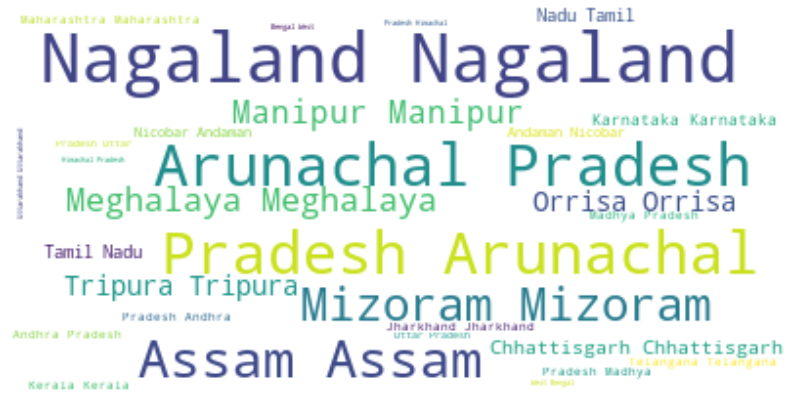

In [19]:
total_deforest = df_forest['TREE COVER LOSS (IN HA)'].sum()
max_words = 10000
word_string = ''

#Generating word string
for state in df_forest['STATE']:
  df_state = df_forest[df_forest['STATE']==state]
  repeat = int(df_state['TREE COVER LOSS (IN HA)']/total_deforest*max_words)
  word_string = word_string + ((state+' ')*repeat)
  #print(state + ' ' + str(repeat))

#Createing word cloud
word_cloud = WordCloud(background_color='white').generate(word_string)

#displaying word cloud
plt.figure(figsize=(14,18))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Visualizing data using Maps

In [20]:
# A map of India
India_map = folium.Map(location=[28.7041, 77.1025], zoom_start=4,)

#instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(India_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_deforest_19.Y, df_deforest_19.X, df_deforest_19.Num_Cases):
    folium.Marker(
        location=[lng, lat],
        icon=None,
        popup=str(label),
    ).add_to(incidents)

#display map
India_map

# Visualization using Regression PLot

In [21]:
def MyRegressplot(reg):
  df_reg = df_deforest[df_deforest['REGION']==reg]
  plt.figure(figsize=(12,8))
  ax = sns.regplot(x='TREE COVER LOSS (IN HA)', y='ANNUAL RAINFALL (IN CM)',data=df_reg, color='green', marker='+', scatter_kws={'s': 200})

In [22]:
s_dropdown = wg.Dropdown(
    options = [('Andaman & Nicobar Islands','Andaman and Nicobar'),
               ('Andhra Pradesh','Andhra Pradesh'),
               ('Arunachal Pradesh','Arunachal Pradesh'),
               ('Assam','Assam'),
               ('Bihar','Bihar'),
               ('Chandigarh','Chandigarh'),
               ('Chhattisgarh','Chhattisgarh'),
               ('Goa','Goa'),
               ('Gujrat','Gujrat'),
               ('Haryana','Haryana'),
               ('Himachal Pradesh','Himachal Pradesh'),
               ('Jammu & Kashmir','Jammu and Kashmir'),
               ('Jharkhand','Jharkhand'),
               ('Karnataka','Karnataka'),
               ('Kerala','Kerala'),
               ('Madhya Pradesh','Madhya Pradesh'),
               ('Maharashtra','Maharashtra'),
               ('Manipur','Manipur'),
               ('Meghalaya','Meghalaya'),
               ('Mizoram','Mizoram'),
               ('Nagaland','Nagaland'),
               ('New Delhi','New Delhi'),
               ('Orissa','Orissa'),
               ('Punjab','Punjab'),
               ('Rajasthan','Rajasthan'),
               ('Sikkim','Sikkim'),
               ('Tamil Nadu','Tamil Nadu'),
               ('Telangana','Telangana'),
               ('Tripura','Tripura'),
               ('Uttar Pradesh','Uttar Pradesh'),
               ('Uttarakhand','Uttarakhand'),
               ('West Bengal','West Bengal')],
    value='Uttarakhand',
    description='REGION:  ')
wg.interact(MyRegressplot,reg=s_dropdown)

interactive(children=(Dropdown(description='REGION:  ', index=30, options=(('Andaman & Nicobar Islands', 'Anda…

<function __main__.MyRegressplot>